Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


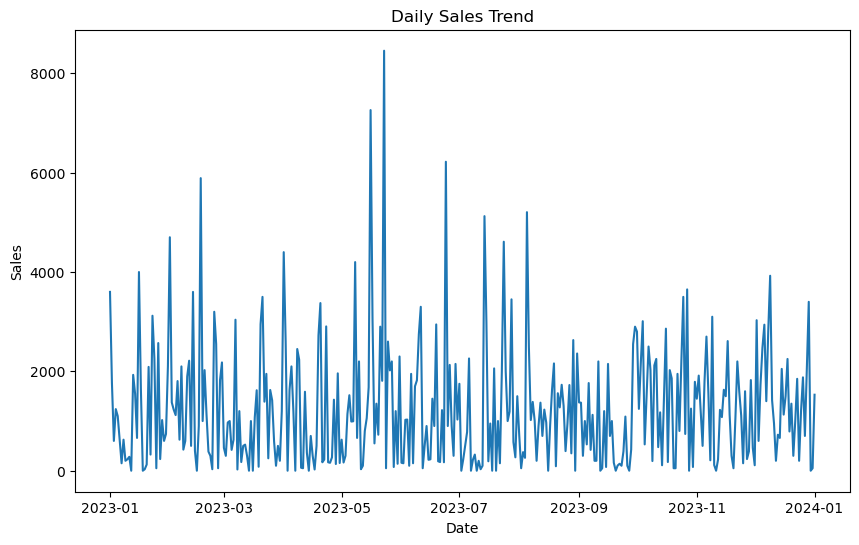

   Age  Gender  Frequency
0   18  Female         13
1   18    Male          8
2   19  Female         11
3   19    Male         10
4   20  Female         12
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


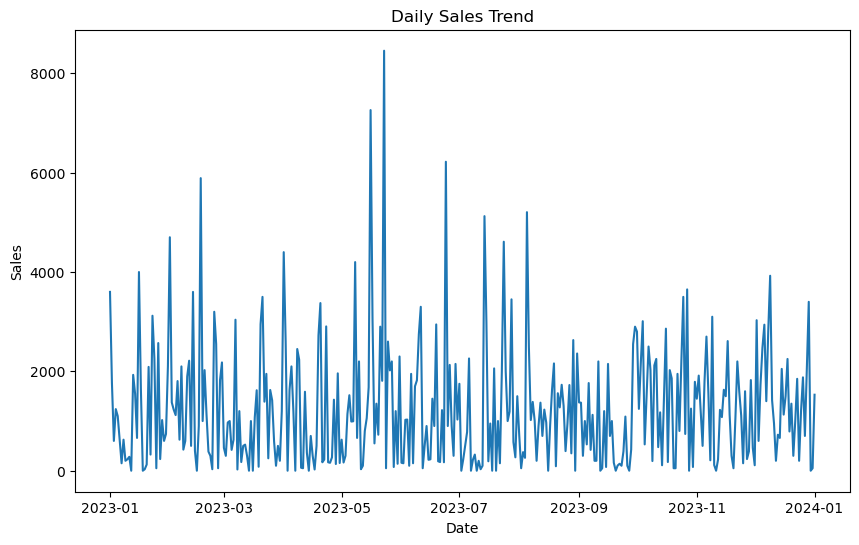

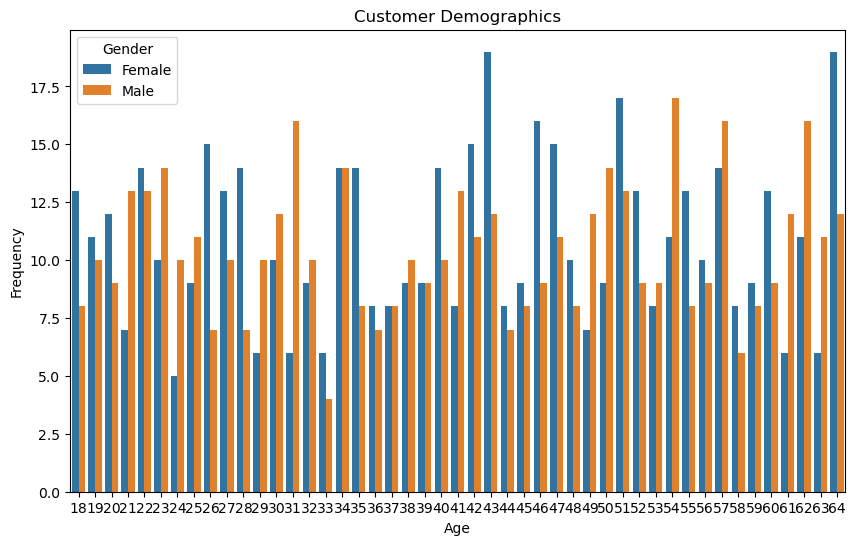

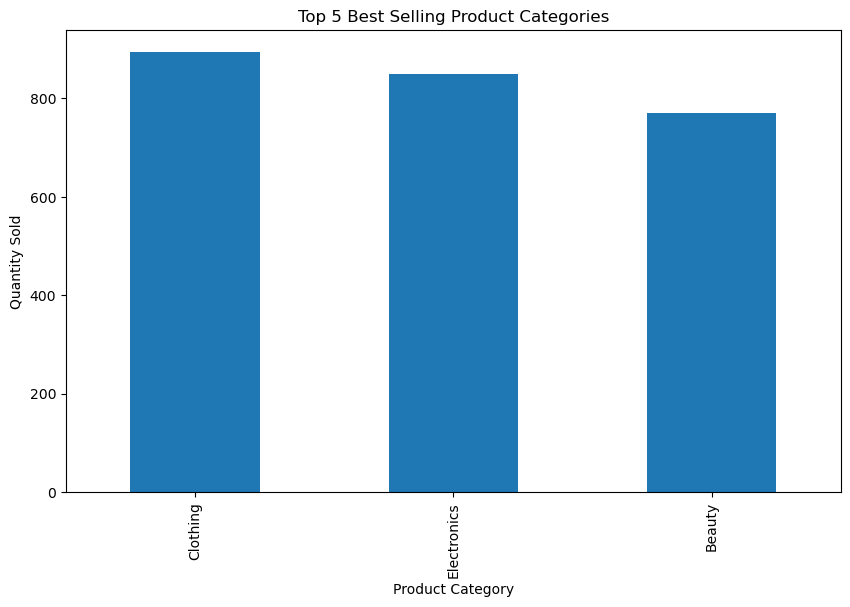

In [2]:

#datset link :
#https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading and Cleaning
# Load dataset
retail_data = pd.read_csv(r"C:\Desktop\oasisintern\rsd.csv")

# Check for missing values and handle them
print(retail_data.isnull().sum())

# Remove duplicates if any
retail_data.drop_duplicates(inplace=True)

# Step 2: Descriptive Statistics
# Calculate basic statistics
basic_stats = retail_data.describe()
print(basic_stats)

# Step 3: Time Series Analysis
# Convert date column to datetime format
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Set Date column as index
retail_data.set_index('Date', inplace=True)

# Resample data to daily frequency and aggregate sales
daily_sales = retail_data['Total Amount'].resample('D').sum()

# Plot sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Step 4: Customer and Product Analysis
# Analyze customer demographics
customer_demographics = retail_data.groupby([ 'Age', 'Gender']).size().reset_index(name='Frequency')
print(customer_demographics.head())

# Product analysis
best_selling_categories = retail_data.groupby('Product Category')['Quantity'].sum().nlargest(5)
print(best_selling_categories)

# Step 5: Visualization
# Visualize sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Visualize customer demographics
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Frequency', hue='Gender', data=customer_demographics)
plt.title('Customer Demographics')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize best selling product categories
plt.figure(figsize=(10, 6))
best_selling_categories.plot(kind='bar')
plt.title('Top 5 Best Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()

# Step 6: Recommendations
# Provide actionable recommendations based on insights gained from EDA
# Example: Target marketing campaigns towards the most frequent customer demographics.
# Example: Focus on stocking and promoting the top-selling product categories to maximize sales.
